# REDUCCIÓN DE DIMENSIONALIDAD en vowel data

Para esta sección se trabaja con vowel data la cual consta de predecir la vocal fonética correspondiente a unas características de frecuencia. El conjunto de datos posee un input correspondiente a 10 características las cuales representan a un periodograma de frecuencias, además de indicar el target(y) el cual corresponde a la etiqueta/clase de la vocal fonética correspondiente.

Son 11 vocales del inglés británico codificada en números del 1 hasta el 11, cada vocal tiene asociada una palabra que la representa:

In [8]:
vocales = ["i:" , "E", "a:", "O", "U", "3:", "I", "A", "Y", "C:", "u:"] 
palabras =  ["heed","head","hard","hod","hood","heard","hid","had","hud","hoard","who'd"]
table =  zip(*[range(1,12),vocales,palabras])
from tabulate import tabulate
print tabulate(table, headers=["Etiqueta","Vocal","Palabra"],  tablefmt="rst")

==========  =======  =========
  Etiqueta  Vocal    Palabra
==========  =======  =========
         1  i:       heed
         2  E        head
         3  a:       hard
         4  O        hod
         5  U        hood
         6  3:       heard
         7  I        hid
         8  A        had
         9  Y        hud
        10  C:       hoard
        11  u:       who'd
==========  =======  =========


In [4]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [5]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [3]:
train_df.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [3]:
print "TRAINING SET"
print train_df.shape
print "el numero de vocales promedio por clase es: %f"%(train_df.shape[0]/11.0)
print "TEST SET"
print test_df.shape
print "el numero de vocales promedio por clase es: %f"%(test_df.shape[0]/11.0)

TRAINING SET
(528, 11)
el numero de vocales promedio por clase es: 48.000000
TEST SET
(462, 11)
el numero de vocales promedio por clase es: 42.000000


En las celdas superiores se cargó la data desde la web de los autores, mostrando secciones del training set y del test set.
La cantidad de registros que posee el training set es de 528 y del test set corresponde a 462. El número promedio de registros por cada clase (cada vocal) es de 48 para el training set y 42 para el test set, teniendo muy pocos datos para representar las clases.

In [5]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)
Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)

En la celda anterior se normalizan los datos para centrarlos y dejarlos preparados para realizar la reducción de dimensionalidad. Este punto es de suma importancia, porque los datos deben estar centrados en el espacio para poder reducir la dimensión, es un paso necesario para los métodos PCA y LDA.

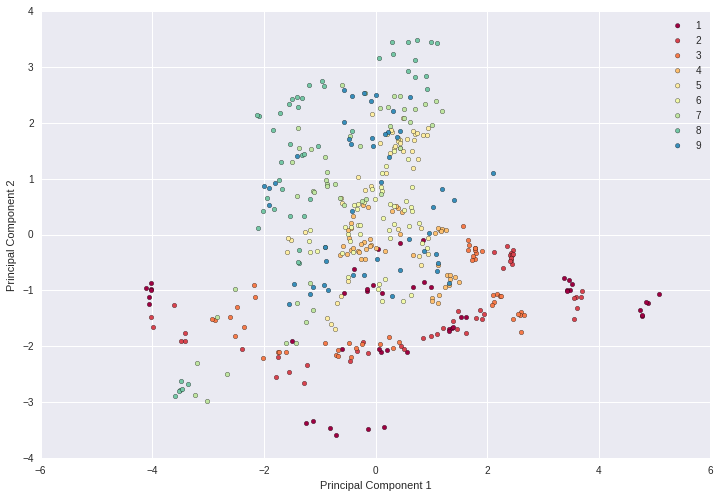

In [6]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap(name = "Spectral") 
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Este gráfico presentado es la representación visual de la transformación PCA del dataset vowel, con 10 características (10 dimensiones), a este espacio de 2 características (2 dimensiones).

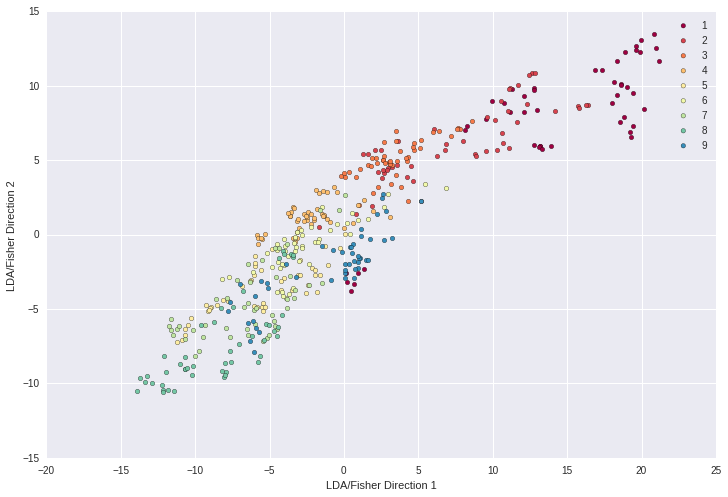

In [9]:
from sklearn.lda import LDA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Este gráfico presentado es la proyecció del dataset vowel, con 10 características (10 dimensiones), a este espacio de 2 características (2 dimensiones) mediante la tecnica LDA. Se ve una clara diferencia en la orientacion de los datos, teniendo un comportamiento mas lineal.

Este gráfico presentado es la representación visual de la transformación LDA del dataset vowel, con 10 características (10 dimensiones), a este espacio de 2 características (2 dimensiones). Donde se ve una clara diferencia en la orientación de los datos con respecto al gráfico de PCA.

En base a estos 2 gráficos presentados anteriormente (gráfico 1 PCA y gráfico 2 LDA), se puede ver una clara diferencia en su orientación en los datos, tomando un comportamiento muy diferente. En el gráfico 1 se obtienen datos más dispersos entre sí, teniendo una orientación circular alrededor del centro del espacio. Para el gráfico 2 se obtienen datos en una orientación lineal, donde estos están ordenados en los ejes (direcciones LDA) de una manera más uniforme.

Para elegir entre estas dos técnicas de reducción de dimensionalidad lo primero es definir cuál es el fin del uso de este, ya que si se tiene el objetivo de tener una simple representación visual de los datos se recomienda utilizar PCA por el menor costo computacional. Si se tiene el objetivo de proyectar los datos en un espacio donde sean linealmente separables, se recomienda utilizar LDA por su propósito implícito de separar los datos de distintas clases entre sí. Va depender fuertemente cuál técnica utilizar (PCA o LDA), en clasificación, de la varianza de los datos entre las clases, ya que mientras más separadas las clases entre sí, es un mejor espacio de proyección para separar las clases y asignar un clasificador óptimo.

El método que se propone es en elegir la técnica en que las clases tengan la menor varianza posible, por ende cada clase tiene sus ejemplos lo más cercano posible entre sí lo cual beneficia la clasificación. También se puede considerar la separación entre las clases, es decir la varianza entre estas. Entre estos 2 criterios el que predomina es el que separa mejor las clases entre sí.

In [1]:
import numpy as np
def clasificar(prob):
    E = 0
    for i in range(len(prob)):
        E += (i+1)*prob[i]
    return E

def detalle(prob):
    a = [["i:" , "E", "a:", "O", "U", "3:", "I", "A", "Y", "C:", "u:"],range(1,12),prob]
    table =  zip(*a)
    from tabulate import tabulate
    print tabulate(table, headers=["Vocal","Clase","Probabilidad"],  tablefmt="rst")
def clasificar_2(y):
    frecuencia =  np.bincount(y) [1:]
    etiquetas = list(set(y))
    total = float(sum(frecuencia))
    prob = [i/total for i in frecuencia]
    detalle(prob)
    print frecuencia
    return np.random.choice(etiquetas,p=prob)

#etiquetas = range(1,12)
print "El valor esperado para un elemento x según el clasificador basado en probabilidad es: %f"%clasificar_2(y)

NameError: name 'y' is not defined

Este clasificador en base a la probabilidad de que cada clase aparezca en el training set se construyó en base a la frecuencia de cada vocal, y luego dividiendo esta frecuencia en el total de datos para así construir la probabilidad. Para este caso como todas las clases aparecen una misma cantidad de veces (48 veces cada una en el training set), la probabilidad asignada para cada clase es la misma, 9% de probabilidad para cada clase. Este clasificador nos muestra que cada vez que intente predecir un $x$ a priori, solo se basará en la probabilidad de las clases, es decir, cada clase será posible ser asignada al valor $x$ con una probabilidad de 9%, por lo que no se tiene preferencia por ninguna en especial y no clasifica en base al training set, ya que la clase que se entrega en base a la probabilidad es de manera aleatoria, sin importar los valores de $x$.

El score de LDA en training test es: 0.683712
El score de LDA en test set es: 0.452381
El score de QDA en training test es: 0.988636
El score de QDA en test set es: 0.415584
El score de k-NN en training test es: 0.931818
El score de k-NN en test set es: 0.491342


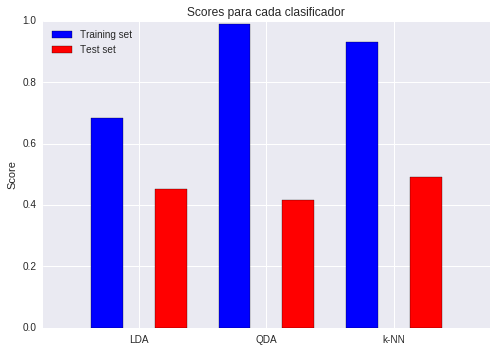

In [10]:
import matplotlib.pyplot as plt
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
lda_model = LDA()
lda_model.fit(X_std,y)
print "El score de LDA en training test es: %f"% lda_model.score(X_std,y)
print "El score de LDA en test set es: %f"% lda_model.score(X_std_test,ytest)

qda_model = QDA()
qda_model.fit(X_std,y)
print "El score de QDA en training test es: %f"% qda_model.score(X_std,y)
print "El score de QDA en test set es: %f"% qda_model.score(X_std_test,ytest)

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_std,y)
print "El score de k-NN en training test es: %f"% knn_model.score(X_std,y)
print "El score de k-NN en test set es: %f"% knn_model.score(X_std_test,ytest)

a = [lda_model.score(X_std,y),lda_model.score(X_std_test,ytest), qda_model.score(X_std,y),qda_model.score(X_std_test,ytest)]
a += [knn_model.score(X_std,y), knn_model.score(X_std_test,ytest)]

fig, ax = plt.subplots()

barlist= ax.bar(range(6), a, width  = 0.5, align = "center", color = ['b','r','b','r','b','r'])
ax.set_ylabel('Score')
ax.set_title('Scores para cada clasificador')
ax.set_xticks([0.5,2.5,4.5])
ax.set_xticklabels(('LDA', 'QDA', 'k-NN'))
ax.legend( barlist,["Training set","Test set"], loc = 2)
plt.show()

Para el caso del Training set el método que mejor se comporta es el QDA, donde este se ajusta al training set con una precisión de 98,8% siendo una métrica bastante buena, esto es debido a sus fronteras cuadráticas, donde estas se ajustan de una manera excepcional para el dato de entrenamiento, generando estas fronteras que separan las clases de una manera casi perfecta en el training set. Para el caso del Test set el método que mejor se comporta es el k-NN (con k=10), donde para el caso del test set este entrega una precisión de 49%.

Se puede ver en el gráfico como el método de LDA es el que presenta una menor diferencia entre el desempeño sobre el training set y el test set, comportándose de una manera en la que su desempeño no depende en gran parte del set al cual se le coloque. Esto es un buen indicador ya que se puede decir que es el que menos genera un $overfitting$. Los métodos de QDA y k-NN al tener esta gran diferencia entre su desempeño se puede decir que generan un $overfitting$, es decir, se ajustan mucho al training set, entregando un resultado muy bueno sobre este, en especial el método QDA el cual se comporta muy bien sobre el training set y sobre el test set no entrega estos resultados.

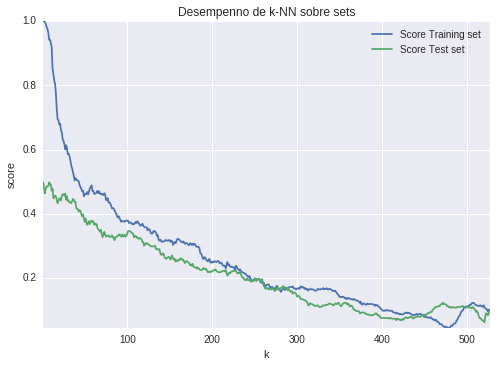

In [17]:
scores_train = []
scores_test = []
n_max = X_std.shape[0] #tamanno del dataset
for i in range(1,n_max):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_std,y)
    
    scores_train += [knn_model.score(X_std,y)]
    scores_test += [knn_model.score(X_std_test,ytest)]
    
import matplotlib.pyplot as plt
plt.plot(range(1,n_max),scores_train, label = "Score Training set")
plt.plot(range(1,n_max),scores_test, label = "Score Test set")

#plt.legend()
plt.xlabel('k')
plt.ylabel('score')
plt.title('Desempenno de k-NN sobre sets')
plt.axis('tight')
plt.legend()
plt.show()

En este gráfico presentado se puede ver cómo varía el desempeño del método k-NN en función de su parámetro $k$ (número de vecinos), mostrando un buen desempeño sobre ambos (test set y training set) cuando el parámetro $k$ es bajo, menor a 100 y cuando la cantidad de vecinos es muy grande este presenta un mal comportamiendo. Se puede ver como cuando la cantidad de vecinos disminuye (menos a 50) este genera un $overfitting$ ya que se ajusta muy bien sobre el training set, no siendo así sobre el test set.

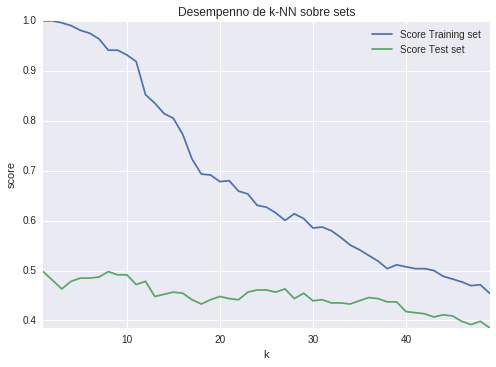

In [30]:
scores_train = []
scores_test = []
n_max = 50
for i in range(1,n_max):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_std,y)
    
    scores_train += [knn_model.score(X_std,y)]
    scores_test += [knn_model.score(X_std_test,ytest)]
    
import matplotlib.pyplot as plt
plt.plot(range(1,n_max),scores_train, label = "Score Training set")
plt.plot(range(1,n_max),scores_test, label = "Score Test set")

#plt.legend()
plt.xlabel('k')
plt.ylabel('score')
plt.title('Desempenno de k-NN sobre sets')
plt.axis('tight')
plt.legend()
plt.show()

En este gráfico se aprecia cuando el parámetro $k$ varía desde 0 a 50. Se puede ver un cambio brusco sobre el training set, ajustándose correctamente sobre el training set, provocando un $overfitting$. Es esperado que este método se comporte correctamente cuando el vecindario es pequeño sobre el training set ya que ese vecindario será la mayoría de la clase dominante.

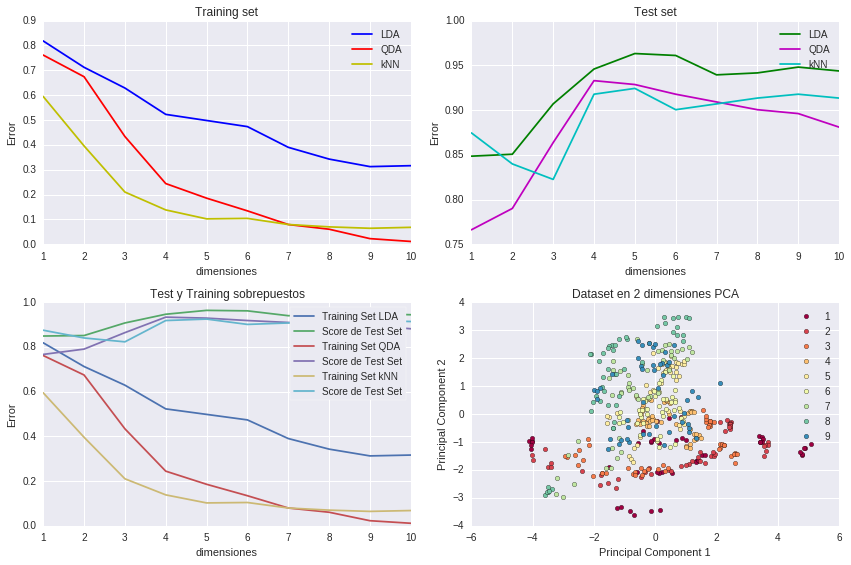

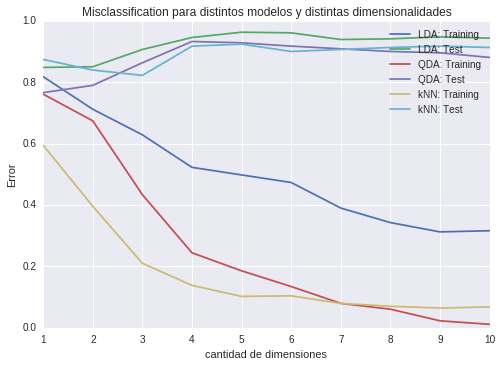

In [21]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def error(model,x,y,xt,yt):
    model.fit(x,y)
    yhat = model.predict(x)
    yhat_test = model.predict(xt)
    error = mis_clas(yhat,y)
    test_error = mis_clas(yhat_test,yt)
    return error, test_error
def mis_clas(yhat,y): #medir el error
    miss = [ 1 if(i != j) else 0  
            for i,j in zip(yhat,y)]
    return np.mean(miss) #promedio << chequear

scores_lda =[]
scores_lda_test =[]
scores_qda =[]
scores_qda_test =[]
scores_knn =[]
scores_knn_test =[]

lda_model = LDA()
qda_model = QDA()
knn_model = KNeighborsClassifier(n_neighbors=10)
for n in range(1,11):
    sklearn_pca = PCA(n_components=n)
    Xpca = sklearn_pca.fit_transform(X_std) #dataset reducido a n dimensiones
    Xpca_test = sklearn_pca.fit_transform(X_std_test) 
    
    #LDA
    lda_model.fit(Xpca,y) #modelo se ajusta a la data en espacio reducido de n dimensiones
    yhat = lda_model.predict(Xpca)
    yhat_test = lda_model.predict(Xpca_test)
    scores_lda.append(mis_clas(yhat,y))
    scores_lda_test.append(mis_clas(yhat_test, ytest))
    
    #QDA
    qda_model.fit(Xpca,y)
    yhat = qda_model.predict(Xpca)
    yhat_test = qda_model.predict(Xpca_test)
    scores_qda.append( mis_clas(yhat,y))
    scores_qda_test.append(mis_clas(yhat_test, ytest))
    
    #kNN
    knn_model.fit(Xpca,y)
    yhat = knn_model.predict(Xpca)
    yhat_test = knn_model.predict(Xpca_test)
    scores_knn.append(mis_clas(yhat,y))
    scores_knn_test.append(mis_clas(yhat_test, ytest))
    
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

####GRAFICOS----------------------
f, axarr = plt.subplots(2, 2,figsize = (12,8))
axarr[0, 0].plot(range(1,11), scores_lda, label="LDA", color = 'b')
axarr[0, 0].plot(range(1,11), scores_qda, label="QDA", color = 'r')
axarr[0, 0].plot(range(1,11), scores_knn, label="kNN", color = 'y')
axarr[0, 0].set_title('Training set')
axarr[0, 0].set_xlabel('dimensiones')
axarr[0, 0].set_ylabel('Error')
axarr[0, 0].legend()

axarr[0, 1].plot(range(1,11), scores_lda_test, label="LDA", color = 'g')
axarr[0, 1].plot(range(1,11), scores_qda_test, label="QDA", color = 'm')
axarr[0, 1].plot(range(1,11), scores_knn_test, label="kNN", color = 'c')
axarr[0, 1].set_title('Test set')
axarr[0, 1].set_xlabel('dimensiones')
axarr[0, 1].set_ylabel('Error')
axarr[0, 1].legend()

axarr[1, 0].plot(range(1,11), scores_lda, label="Training Set LDA")
axarr[1, 0].plot(range(1,11), scores_lda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_qda, label="Training Set QDA")
axarr[1, 0].plot(range(1,11), scores_qda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_knn, label="Training Set kNN")
axarr[1, 0].plot(range(1,11), scores_knn_test, label="Score de Test Set")
axarr[1, 0].set_title('Test y Training sobrepuestos')
axarr[1, 0].set_xlabel('dimensiones')
axarr[1, 0].set_ylabel('Error')
axarr[1, 0].legend(frameon=True)

#AYUDA VISUAL
sklearn_pca = PCA(n_components=2)
Xpca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
for lab, col in zip(mclasses,mcolors):
    axarr[1, 1].scatter(Xpca[y==lab, 0],Xpca[y==lab, 1],label=lab,c=col)
axarr[1, 1].set_xlabel('Principal Component 1')
axarr[1, 1].set_ylabel('Principal Component 2')
axarr[1, 1].legend(loc='upper right', fancybox=True)
axarr[1, 1].set_title('Dataset en 2 dimensiones PCA')

f.tight_layout() #separar los subplot
plt.show()

#especificamente el tercer subplot, mas detallado de cerca
plt.plot(range(1,11), scores_lda, label="LDA: Training")
plt.plot(range(1,11), scores_lda_test, label="LDA: Test")
plt.plot(range(1,11), scores_qda, label="QDA: Training")
plt.plot(range(1,11), scores_qda_test, label="QDA: Test")
plt.plot(range(1,11), scores_knn, label="kNN: Training")
plt.plot(range(1,11), scores_knn_test, label="kNN: Test")
plt.title('Misclassification para distintos modelos y distintas dimensionalidades')
plt.xlabel('cantidad de dimensiones')
plt.ylabel('Error')
plt.legend()
plt.show()

Para este caso se presenta el efecto de reducir dimensionalidad con la técnica PCA, graficando el error de los distintos modelos, donde este error fue calculado como el $misclassification$ error, donde se asigna un valor de pérdida 1 si el modelo predice una etiqueta incorrectamente y si predice correctamente no asigna pérdida.

Para este caso en el que se reduce la dimensionalidad con la técnica PCA, se encuentra que sobre el training set a medida que se disminuye la cantidad de dimensiones (componentes principales) el error aumenta sobre los 3 modelos de clasificación, esto es ya que PCA no tiene el fin de separar las clases entre sí, sino que es una técnica de reducción basada en la varianza de todos los datos.

A medida que el número de dimensiones disminuye, los 3 modelos tienden a aumentar su error de entrenamiento y a disminuir su error de prueba, disminuyendo la diferencia entre estos, reduciendo el $overfitting$, por lo que con este gráfico se puede comprobar la aseveración de que el efecto de aplicar una reducción de dimensionalidad, reduce el overfitting.

Se puede ver como el error de entrenamiento y de prueba en QDA convergen a un valor similar cuando el número de dimensiones es 1, es decir una recta. También se puede ver que el método que mejor se comporta en el training set es es k-NN en 6 dimensiones (1,2,3,4,5,6) y que el método que mejor se comporta a lo largo de las dimensionalidades en el test set es QDA, comportándose mejor en 5 dimensionalidades (1,2,8,9,10). El mejor resultado en el test set se produce con una dimensión (una recta) con el método QDA, el mejor resultado con el training set se produce con diez dimensiones con el mismo método.

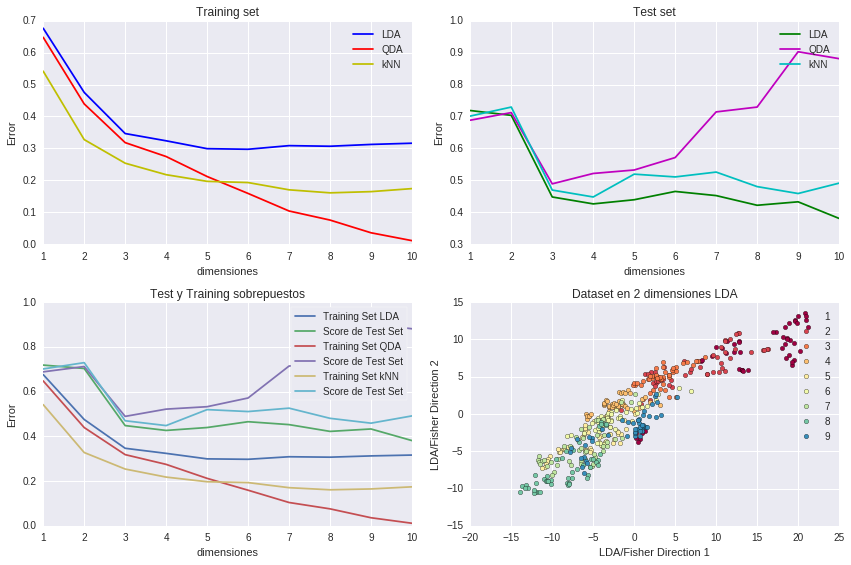

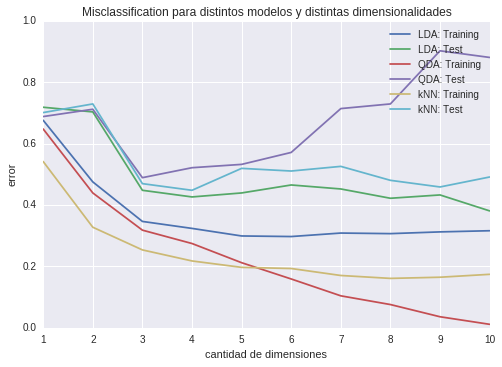

In [28]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def mis_clas(yhat,y): #medir el error
    miss = [ 1 if(i != j) else 0  
            for i,j in zip(yhat,y)]
    return np.mean(miss) #promedio << chequear

scores_lda =[]
scores_lda_test =[]
scores_qda =[]
scores_qda_test =[]
scores_knn =[]
scores_knn_test =[]

lda_model = LDA()
qda_model = QDA()
knn_model = KNeighborsClassifier(n_neighbors=10)

for n in range(1,11):
    sklearn_lca = LDA(n_components=n)
    X = sklearn_lca.fit_transform(X_std,y) #dataset reducido a n dimensiones
    Xt = sklearn_lca.fit_transform(X_std_test,ytest) 
    
    #LDA
    lda_model.fit(X,y) #modelo se ajusta a la data en espacio reducido de n dimensiones
    yhat = lda_model.predict(X)
    yhat_test = lda_model.predict(Xt)
    scores_lda.append(mis_clas(yhat,y))
    scores_lda_test.append(mis_clas(yhat_test, ytest))
    
    #QDA
    qda_model.fit(X,y)
    yhat = qda_model.predict(X)
    yhat_test = qda_model.predict(Xt)
    scores_qda.append( mis_clas(yhat,y))
    scores_qda_test.append(mis_clas(yhat_test, ytest))
    
    #kNN
    knn_model.fit(X,y)
    yhat = knn_model.predict(X)
    yhat_test = knn_model.predict(Xt)
    scores_knn.append(mis_clas(yhat,y))
    scores_knn_test.append(mis_clas(yhat_test, ytest))
    
####GRAFICOS-----------------
f, axarr = plt.subplots(2, 2, figsize=(12,8))
axarr[0, 0].plot(range(1,11), scores_lda, label="LDA", color = 'b')
axarr[0, 0].plot(range(1,11), scores_qda, label="QDA", color = 'r')
axarr[0, 0].plot(range(1,11), scores_knn, label="kNN", color = 'y')
axarr[0, 0].set_title('Training set')
axarr[0, 0].set_xlabel('dimensiones')
axarr[0, 0].set_ylabel('Error')
axarr[0, 0].legend()

axarr[0, 1].plot(range(1,11), scores_lda_test, label="LDA", color = 'g')
axarr[0, 1].plot(range(1,11), scores_qda_test, label="QDA", color = 'm')
axarr[0, 1].plot(range(1,11), scores_knn_test, label="kNN", color = 'c')
axarr[0, 1].set_title('Test set')
axarr[0, 1].set_xlabel('dimensiones')
axarr[0, 1].set_ylabel('Error')
axarr[0, 1].legend()

axarr[1, 0].plot(range(1,11), scores_lda, label="Training Set LDA")
axarr[1, 0].plot(range(1,11), scores_lda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_qda, label="Training Set QDA")
axarr[1, 0].plot(range(1,11), scores_qda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_knn, label="Training Set kNN")
axarr[1, 0].plot(range(1,11), scores_knn_test, label="Score de Test Set")
axarr[1, 0].set_title('Test y Training sobrepuestos')
axarr[1, 0].set_xlabel('dimensiones')
axarr[1, 0].set_ylabel('Error')
axarr[1, 0].legend(frameon=True)

#AYUDA VISUAL
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
for lab, col in zip(mclasses,mcolors):
    axarr[1, 1].scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
c=col)
axarr[1, 1].set_xlabel('LDA/Fisher Direction 1')
axarr[1, 1].set_ylabel('LDA/Fisher Direction 2')
axarr[1, 1].legend(loc='upper right', fancybox=True)
axarr[1, 1].set_title('Dataset en 2 dimensiones LDA')

f.tight_layout() #separar los subplot
plt.show()

#especificamente el tercer subplot, mas detallado de cerca
plt.plot(range(1,11), scores_lda, label="LDA: Training")
plt.plot(range(1,11), scores_lda_test, label="LDA: Test")
plt.plot(range(1,11), scores_qda, label="QDA: Training")
plt.plot(range(1,11), scores_qda_test, label="QDA: Test")
plt.plot(range(1,11), scores_knn, label="kNN: Training")
plt.plot(range(1,11), scores_knn_test, label="kNN: Test")
plt.title('Misclassification para distintos modelos y distintas dimensionalidades')
plt.xlabel('cantidad de dimensiones')
plt.ylabel('error')
plt.legend()
plt.show()

Para este caso de reducción de dimensionalidad mediante la técnica de LDA se puede ver que para los 3 modelos el comportamiento sobre el training set a lo largo de las dimensiones es similar al de PCA, donde a medida que se disminuye el número de dimensiones, el error sobre el training set aumenta. Sin embargo para el caso sobre el test set, se puede ver como el error en los 3 modelos disminuye hasta un cierto punto, 3 dimensiones. En el gráfico conjunto (training set y test set) se aprecia como los errores de entrenamiento y de prueba en los 3 modelos son cercanos entre si, comportándose de una manera similar a lo largo de todas las dimensiones. Se puede ver que el mejor espacio para proyectar los datos con LDA son 3 dimensiones, ya que los 3 modelos poseen un bajo $overfitting$, además de poseer un muy bajo error de prueba.

Para el training set, el modelo que posee menor error a lo largo de todas las dimensiones es k-NN (dominando con 5 dimensiones). Para el test set el modelo que predomina con menor error a lo largo de las dimensiones es LDA.

### PCA vs. LDA (Reducción de Dimensionalidad)

###### LDA:

<ul>
<li> El rango en el que varía los errores de entrenamiento y de pruebas es más bajo que el de PCA, presentando un mejor comportamiento de acorde a su propósito de reducción de dimensionalidad con el fin de separar las clases entre sí.</li>
<li> Menor $overfitting$ a lo largo de todas las dimensiones, representando en la diferencia entre los errores de entrenamiento y de prueba.</li>
<li> Con menos de 3 dimensiones el rendimiento decae bruscamente.</li>
</ul>

###### PCA:

<ul>
<li> El error de prueba es más estable, independiente del modelo y de las dimensiones a las cuales se reduzca. </li>
<li> La variación del error entre cada cambio de dimensión es menor que la de LDA.</li>
</ul>